In [76]:
#import required libraries
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from scipy.stats import skew
from sklearn.decomposition import PCA
import torch
from torch import nn
import pytorch_lightning as pl
import torch.nn.functional as F
from torchmetrics import Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


# Setting seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# # Define the directory containing the CSV files
# directory = 'C:/Users/abdul/Documents/SuperProfMLAssignment'  # Change this to the path of your directory

# # Get a list of all CSV filenames in the directory
# csvfilenames = [f for f in os.listdir(directory) if f.endswith('.csv')]

# dfs = []

# for filename in csvfilenames:
#     file_path = os.path.join(directory, filename)
#     df = pd.read_csv(file_path)
#     patient_id = os.path.splitext(filename)[0]  # Extract patient_id from filename
#     df['patient_id'] = int(patient_id)  # Ensure patient_id is an integer
#     dfs.append(df)

# label_df = pd.read_excel('lable.xlsx')
# # Ensure patient_id in the label dataframe is an integer
# label_df['id_random'] = label_df['id_random'].astype(int)
# # Merge each dataframe in dfs with the label dataframe
# merged_dfs = []
# for df in dfs:
#     merged_df = df.merge(label_df, how='left', left_on='patient_id', right_on='id_random')
#     # Reorder columns to have patient_id as the first column
#     columns_order = ['patient_id'] + [col for col in merged_df.columns if col != 'id_random' and col != 'patient_id']
#     merged_df = merged_df[columns_order]
#     merged_dfs.append(merged_df)



# df = pd.concat(merged_dfs, ignore_index=True)


# # Apply Transformations
# df['FSC_log'] = np.log1p(df['FSC'])
# df['SSC_log'] = np.log1p(df['SSC'])
# df['CD16_log'] = np.log1p(df['CD16 AF488'])
# df['CD14_log'] = np.log1p(df['CD14-PE'])
# df['CD42a_log'] = np.log1p(df['CD42a-PerCP'])
# df['CCR2_log'] = np.log1p(df['CCR2-APC'])

# # Statistical Features 
# agg_functions = ['mean', 'std', 'median']
# df_agg = df.groupby('patient_id')[['FSC_log', 'SSC_log', 'CD16_log', 'CD14_log', 'CD42a_log', 'CCR2_log']].agg(agg_functions)



# #Flatten the multi-index columns
# df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]

# #Add back the patient ID as a column
# # df_agg = df_agg.reset_index()

# # df_agg = df_agg.merge(label_df, how='left', left_on='patient_id', right_on='id_random')

# # df_agg.drop(columns=['id_random'], inplace=True)

# # Combine the aggregated features with the original DataFrame
# df = pd.concat([df, df_agg], axis=1)

# # Remove original features
# df.drop(columns=['FSC', 'SSC', 'CD16 AF488', 'CD14-PE', 'CD42a-PerCP', 'CCR2-APC'], inplace=True)



# # Handle infinite and large values
# df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
# df.fillna(df.mean(), inplace=True)  # Fill NaNs with mean values

# # Cap extremely large values (e.g., 3 standard deviations from the mean)
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# numeric_cols = numeric_cols.drop(['patient_id'])  # Exclude 'patient_id' from numeric columns
# for col in numeric_cols:
#     col_mean = df[col].mean()
#     col_std = df[col].std()
#     cap = col_mean + 3 * col_std
#     df[col] = np.where(df[col] > cap, cap, df[col])

# # Feature Selection (Remove highly skewed features)
# skew_threshold = 2
# numeric_features = df.select_dtypes(include=[np.number])  # Select only numeric columns
# skewed_features = numeric_features.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# skewed_features = skewed_features[skewed_features > skew_threshold]
# df.drop(skewed_features.index, axis=1, inplace=True)



# df.head()
# #df_agg.head()

In [77]:
# def focal_loss(y_true, y_pred):
#     alpha = 0.25
#     gamma = 2.0

#     p = 1 / (1 + np.exp(-y_pred))
#     grad = alpha * (y_true - p) * (1 - p) ** gamma
#     hess = alpha * gamma * (y_true - p) * (1 - p) ** (gamma - 1) * p * (1 - p) + grad * (1 - p)
    
#     return grad, hess


In [78]:
# from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.neighbors import NearestNeighbors


 
# # Separate features and target
# X = df.drop(columns=['Label', 'patient_id'])  
# y = df['Label']
# patient_ids = df['patient_id']


# # Split data into train, validation, and test sets
# X_temp, X_test, y_temp, y_test, patient_ids_temp, patient_ids_test = train_test_split(
#     X, y, patient_ids, test_size=0.2, random_state=42, stratify=patient_ids)

# X_train, X_val, y_train, y_val, patient_ids_train, patient_ids_val = train_test_split(
#     X_temp, y_temp, patient_ids_temp, test_size=0.25, random_state=42, stratify=patient_ids_temp)


# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)




# # Train the XGBoost classifier
# model = XGBClassifier(objective=focal_loss, use_label_encoder=False, eval_metric='logloss', random_state=42)
# model.fit(X_train_scaled, y_train)
    
    

# # Get feature importances
# feature_importances = model.feature_importances_
# important_feature = X.columns[np.argmax(feature_importances)]

# print(f"Most important feature: {important_feature}")

In [79]:
# # Define a function to select the most significant record for each patient_id
# def select_significant_record(group, important_feature):
#     # Select the record with the maximum value of the most important feature
#     significant_record = group.loc[group[important_feature].idxmax()]
#     return significant_record

# # Apply the function to each patient_id group
# df = df.groupby('patient_id').apply(lambda group: select_significant_record(group, important_feature))

# # Reset index
# df.reset_index(drop=True, inplace=True)

# # Display the significant records
# df

In [80]:
df = pd.read_csv('nada1.csv')
df.head()

,patient_id,Label,FSC_log,SSC_log,CD16_log,CD14_log,CD42a_log,CCR2_log,FSC_log_mean,FSC_log_std,...,CD16_log_median,CD14_log_mean,CD14_log_std,CD14_log_median,CD42a_log_mean,CD42a_log_std,CD42a_log_median,CCR2_log_mean,CCR2_log_std,CCR2_log_median
0,103.0,0.0,6.931472,6.931472,6.492240,6.373320,0.000000,5.929589,6.334254,0.539625,...,6.385174,5.289046,0.902717,5.451764,4.975513,0.96248,5.18782,5.636373,0.585351,5.746276
1,105.0,0.0,6.931472,6.563856,6.529419,0.000000,5.505332,5.852202,6.334254,0.539625,...,6.385174,5.289046,0.902717,5.451764,4.975513,0.96248,5.18782,5.636373,0.585351,5.746276
2,110.0,0.0,6.931472,6.896694,6.434547,4.867534,5.616771,5.480639,6.334254,0.539625,...,6.385174,5.289046,0.902717,5.451764,4.975513,0.96248,5.18782,5.636373,0.585351,5.746276
3,113.0,0.0,6.931472,5.192957,6.428105,6.760415,5.049856,6.291569,6.334254,0.539625,...,6.385174,5.289046,0.902717,5.451764,4.975513,0.96248,5.18782,5.636373,0.585351,5.746276
4,116.0,0.0,6.931472,6.931472,6.520621,6.476972,6.670766,6.508769,6.334254,0.539625,...,6.385174,5.289046,0.902717,5.451764,4.975513,0.96248,5.18782,5.636373,0.585351,5.746276


In [91]:
# Separate features and target
X = df.drop(columns=['Label', 'patient_id']).values  
df['Label'] = df['Label'].astype(int)
y = df['Label'].values
patient_ids = df['patient_id'].values
print(X.shape)

# # Split data into train and remaining (val + test)
# X_train, X_remaining, y_train, y_remaining, patient_ids_train, patient_ids_remaining = train_test_split(
#     X, y, patient_ids, test_size=0.4, random_state=42  # Reserve 40% for val + test
# )

# # Split the remaining data into validation and test sets of equal size
# X_val, X_test, y_val, y_test, patient_ids_val, patient_ids_test = train_test_split(
#     X_remaining, y_remaining, patient_ids_remaining, test_size=0.5, random_state=42  # 50% of remaining -> 20% of original
# )

(246, 24)


In [82]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return torch.mean(F_loss)

In [83]:

class SoftOrdering1DCNN(pl.LightningModule):

    def __init__(self, input_dim, output_dim, sign_size=32, cha_input=16, cha_hidden=32, 
                 K=2, dropout_input=0.2, dropout_hidden=0.2, dropout_output=0.2):
        super().__init__()
       

        hidden_size = sign_size * cha_input
        sign_size1 = sign_size
        sign_size2 = sign_size // 2
        output_size = (sign_size // 4) * cha_hidden

        self.hidden_size = hidden_size
        self.cha_input = cha_input
        self.cha_hidden = cha_hidden
        self.K = K
        self.sign_size1 = sign_size1
        self.sign_size2 = sign_size2
        self.output_size = output_size
        self.dropout_input = dropout_input
        self.dropout_hidden = dropout_hidden
        self.dropout_output = dropout_output

        self.batch_norm1 = nn.BatchNorm1d(input_dim)
        self.dropout1 = nn.Dropout(dropout_input)
        dense1 = nn.Linear(input_dim, hidden_size, bias=False)
        self.dense1 = nn.utils.weight_norm(dense1)

        # 1st conv layer
        self.batch_norm_c1 = nn.BatchNorm1d(cha_input)
        conv1 = nn.Conv1d(
            cha_input, 
            cha_input * K, 
            kernel_size=5, 
            stride=1, 
            padding=2,  
            groups=cha_input, 
            bias=False)
        self.conv1 = nn.utils.weight_norm(conv1, dim=None)

        self.ave_po_c1 = nn.AdaptiveAvgPool1d(output_size=sign_size2)

        # 2nd conv layer
        self.batch_norm_c2 = nn.BatchNorm1d(cha_input * K)
        self.dropout_c2 = nn.Dropout(dropout_hidden)
        conv2 = nn.Conv1d(
            cha_input * K, 
            cha_hidden, 
            kernel_size=3, 
            stride=1, 
            padding=1, 
            bias=False)
        self.conv2 = nn.utils.weight_norm(conv2, dim=None)

        # 3rd conv layer
        self.batch_norm_c3 = nn.BatchNorm1d(cha_hidden)
        self.dropout_c3 = nn.Dropout(dropout_hidden)
        conv3 = nn.Conv1d(
            cha_hidden, 
            cha_hidden, 
            kernel_size=3, 
            stride=1, 
            padding=1, 
            bias=False)
        self.conv3 = nn.utils.weight_norm(conv3, dim=None)

        # 4th conv layer
        self.batch_norm_c4 = nn.BatchNorm1d(cha_hidden)
        conv4 = nn.Conv1d(
            cha_hidden, 
            cha_hidden, 
            kernel_size=5, 
            stride=1, 
            padding=2, 
            groups=cha_hidden, 
            bias=False)
        self.conv4 = nn.utils.weight_norm(conv4, dim=None)

        self.avg_po_c4 = nn.AvgPool1d(kernel_size=4, stride=2, padding=1)

        self.flt = nn.Flatten()

        self.batch_norm2 = nn.BatchNorm1d(output_size)
        self.dropout2 = nn.Dropout(dropout_output)
        dense2 = nn.Linear(output_size, output_dim, bias=False)
        self.dense2 = nn.utils.weight_norm(dense2)

        self.loss = FocalLoss(alpha=0.75, gamma=2)

        self.loss = nn.BCEWithLogitsLoss()

        

        self.train_accuracy = Accuracy(task='binary')
        self.val_accuracy = Accuracy(task='binary')
        self.test_accuracy = Accuracy(task='binary')

    def forward(self, x):
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = F.celu(self.dense1(x))

        x = x.reshape(x.shape[0], self.cha_input, self.sign_size1)

        x = self.batch_norm_c1(x)
        x = F.relu(self.conv1(x))

        x = self.ave_po_c1(x)

        x = self.batch_norm_c2(x)
        x = self.dropout_c2(x)
        x = F.relu(self.conv2(x))
        x_s = x

        x = self.batch_norm_c3(x)
        x = self.dropout_c3(x)
        x = F.relu(self.conv3(x))

        x = self.batch_norm_c4(x)
        x = self.conv4(x)
        x = x + x_s
        x = F.relu(x)

        x = self.avg_po_c4(x)

        x = self.flt(x)

        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = self.dense2(x)

        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
    
        loss = self.loss(y_hat, y.float())
        preds = torch.sigmoid(y_hat)
        acc = self.train_accuracy(preds, y.int())
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        loss = self.loss(y_hat, y.float())
        preds = torch.sigmoid(y_hat)
        acc = self.val_accuracy(preds, y.int())
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_accuracy', self.test_accuracy(y_hat, y.int()), prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer


In [84]:
# Aggregate the results
def aggregate_results(results):
    avg_report = {}
    for key in results[0].keys():
        if isinstance(results[0][key], dict):
            avg_report[key] = {}
            for sub_key in results[0][key].keys():
                avg_report[key][sub_key] = np.mean([result[key][sub_key] for result in results])
        else:
            avg_report[key] = np.mean([result[key] for result in results])
    return avg_report

In [85]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold

kfold_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

cms = []  # List to store confusion matrices for each fold
accuracies = []

for fold_outer, (train_val_idx, test_idx) in enumerate(kfold_outer.split(X, y)):
    X_train_val, X_test = X[train_val_idx], X[test_idx]
    y_train_val, y_test = y[train_val_idx], y[test_idx]
    patient_ids_train_val = patient_ids[train_val_idx]
    patient_ids_test = patient_ids[test_idx]
    kfold_inner = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  # Inner loop for validation
    for fold_inner, (train_idx, val_idx) in enumerate(kfold_inner.split(X_train_val, y_train_val)):
        X_train, X_val = X_train_val[train_idx], X_train_val[val_idx]
        y_train, y_val = y_train_val[train_idx], y_train_val[val_idx]
        patient_ids_train = patient_ids_train_val[train_idx]
        patient_ids_val = patient_ids_train_val[val_idx]

        print(f"Fold {fold_outer + 1}.{fold_inner + 1}:")
        print(f"  Training samples: {len(X_train)}")
        print(f"  Validation samples: {len(X_val)}")
        print(f"  Testing samples: {len(X_test)}")

        # Convert data to PyTorch tensors
        train_dataset = TensorDataset(torch.tensor(X_train , dtype=torch.float32), torch.tensor(y_train,  dtype=torch.float32))
        val_dataset = TensorDataset(torch.tensor(X_val,  dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
        test_dataset = TensorDataset(torch.tensor(X_test , dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).unsqueeze(1))

        # Create DataLoaders
        batch_size = 32
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Initialize the model
        input_dim = X.shape[1]
        output_dim = 1 # Since it is Binary Classification

        model = SoftOrdering1DCNN(input_dim, output_dim)

        # Initialize the trainer
        trainer = pl.Trainer(max_epochs=10, accelerator='gpu' if torch.cuda.is_available() else 'auto')

        # Train the model
        trainer.fit(model, train_loader, val_loader )

        # Evaluate on the test set
        trainer.test(model, test_loader)

        # Make predictions on the validation set
        model.eval()
        y_pred = []


        with torch.no_grad():
            for batch in val_loader:
                x,_ = batch
                y_hat = model(x).squeeze()
                y_pred.extend(torch.sigmoid(y_hat).cpu().numpy())

        # Convert y_pred to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
        y_pred = np.round(y_pred).astype(int)
        

        cm = confusion_matrix(y_val, y_pred)
        print(f"Confusion Matrix: {cm}")
        
        cms.append(cm)

        accuracy = accuracy_score(y_val, y_pred)
        print(f"Accuracy: {accuracy}")

        accuracies.append(accuracy)

        # Calculate classification metrics
        report = classification_report(y_val, y_pred, output_dict=True)
        print(f"Classification Report: {report}")

        fold_results.append(report)
        




c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout     

Fold 1.1:
  Training samples: 147
  Validation samples: 49
  Testing samples: 50
                                                                            

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.71it/s, v_num=547, train_loss=0.537, train_acc=0.737, val_loss=0.667, val_acc=0.653]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 27.13it/s, v_num=547, train_loss=0.537, train_acc=0.737, val_loss=0.667, val_acc=0.653]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 83.34it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.5799999833106995     │
│         test_loss         │    0.6658413410186768     │
└───────────────────────────┴───────────────────────────┘

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Confusion Matrix: [[29 10]
 [ 7  3]]
Accuracy: 0.6530612244897959
Classification Report: {'0': {'precision': 0.8055555555555556, 'recall': 0.7435897435897436, 'f1-score': 0.7733333333333334, 'support': 39}, '1': {'precision': 0.23076923076923078, 'recall': 0.3, 'f1-score': 0.2608695652173913, 'support': 10}, 'accuracy': 0.6530612244897959, 'macro avg': {'precision': 0.5181623931623932, 'recall': 0.5217948717948718, 'f1-score': 0.5171014492753624, 'support': 49}, 'weighted avg': {'precision': 0.6882522239665098, 'recall': 0.6530612244897959, 'f1-score': 0.6687488908606922, 'support': 49}}
Fold 1.2:
  Training samples: 147
  Validation samples: 49
  Testing samples: 50


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 34.01it/s, v_num=548, train_loss=0.569, train_acc=0.737, val_loss=0.682, val_acc=0.694]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 30.67it/s, v_num=548, train_loss=0.569, train_acc=0.737, val_loss=0.682, val_acc=0.694]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 76.93it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7200000286102295     │
│         test_loss         │    0.6202609539031982     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[34  5]
 [10  0]]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Accuracy: 0.6938775510204082
Classification Report: {'0': {'precision': 0.7727272727272727, 'recall': 0.8717948717948718, 'f1-score': 0.8192771084337349, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10}, 'accuracy': 0.6938775510204082, 'macro avg': {'precision': 0.38636363636363635, 'recall': 0.4358974358974359, 'f1-score': 0.40963855421686746, 'support': 49}, 'weighted avg': {'precision': 0.6150278293135436, 'recall': 0.6938775510204082, 'f1-score': 0.6520776985492992, 'support': 49}}
Fold 1.3:
  Training samples: 147
  Validation samples: 49
  Testing samples: 50


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 32.87it/s, v_num=549, train_loss=0.592, train_acc=0.737, val_loss=0.645, val_acc=0.714]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.74it/s, v_num=549, train_loss=0.592, train_acc=0.737, val_loss=0.645, val_acc=0.714]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 83.34it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7599999904632568     │
│         test_loss         │    0.6226770877838135     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[35  4]
 [10  0]]
Accuracy: 0.7142857142857143
Classification Report: {'0': {'precision': 0.7777777777777778, 'recall': 0.8974358974358975, 'f1-score': 0.8333333333333333, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10}, 'accuracy': 0.7142857142857143, 'macro avg': {'precision': 0.3888888888888889, 'recall': 0.44871794871794873, 'f1-score': 0.41666666666666663, 'support': 49}, 'weighted avg': {'precision': 0.6190476190476191, 'recall': 0.7142857142857143, 'f1-score': 0.6632653061224489, 'support': 49}}
Fold 1.4:
  Training samples: 147
  Validation samples: 49
  Testing samples: 50


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout     

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 124.98it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 27.85it/s, v_num=550, train_loss=0.647, train_acc=0.632, val_loss=0.631, val_acc=0.653]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 25.44it/s, v_num=550, train_loss=0.647, train_acc=0.632, val_loss=0.631, val_acc=0.653]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 72.68it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.6800000071525574     │
│         test_loss         │    0.6328441500663757     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[31  8]
 [ 9  1]]
Accuracy: 0.6530612244897959


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Classification Report: {'0': {'precision': 0.775, 'recall': 0.7948717948717948, 'f1-score': 0.7848101265822786, 'support': 39}, '1': {'precision': 0.1111111111111111, 'recall': 0.1, 'f1-score': 0.10526315789473685, 'support': 10}, 'accuracy': 0.6530612244897959, 'macro avg': {'precision': 0.44305555555555554, 'recall': 0.4474358974358974, 'f1-score': 0.4450366422385077, 'support': 49}, 'weighted avg': {'precision': 0.6395124716553289, 'recall': 0.6530612244897959, 'f1-score': 0.6461270717480864, 'support': 49}}
Fold 2.1:
  Training samples: 147
  Validation samples: 50
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 32.36it/s, v_num=551, train_loss=0.566, train_acc=0.789, val_loss=0.604, val_acc=0.720]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.50it/s, v_num=551, train_loss=0.566, train_acc=0.789, val_loss=0.604, val_acc=0.720]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 75.42it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7551020383834839     │
│         test_loss         │    0.5874741077423096     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[36  3]
 [11  0]]
Accuracy: 0.72
Classification Report: {'0': {'precision': 0.7659574468085106, 'recall': 0.9230769230769231, 'f1-score': 0.8372093023255814, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11}, 'accuracy': 0.72, 'macro avg': {'precision': 0.3829787234042553, 'recall': 0.46153846153846156, 'f1-score': 0.4186046511627907, 'support': 50}, 'weighted avg': {'precision': 0.5974468085106382, 'recall': 0.72, 'f1-score': 0.6530232558139535, 'support': 50}}
Fold 2.2:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout     

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 31.25it/s, v_num=552, train_loss=0.572, train_acc=0.750, val_loss=0.619, val_acc=0.755]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 28.41it/s, v_num=552, train_loss=0.572, train_acc=0.750, val_loss=0.619, val_acc=0.755]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 88.85it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7551020383834839     │
│         test_loss         │    0.5938753485679626     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[37  2]
 [10  0]]
Accuracy: 0.7551020408163265
Classification Report: {'0': {'precision': 0.7872340425531915, 'recall': 0.9487179487179487, 'f1-score': 0.8604651162790696, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10}, 'accuracy': 0.7551020408163265, 'macro avg': {'precision': 0.39361702127659576, 'recall': 0.47435897435897434, 'f1-score': 0.4302325581395348, 'support': 49}, 'weighted avg': {'precision': 0.6265740338688667, 'recall': 0.7551020408163265, 'f1-score': 0.6848599905078309, 'support': 49}}
Fold 2.3:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout     

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 111.11it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 33.89it/s, v_num=553, train_loss=0.671, train_acc=0.600, val_loss=0.598, val_acc=0.735]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 30.76it/s, v_num=553, train_loss=0.671, train_acc=0.600, val_loss=0.598, val_acc=0.735]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 76.92it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.6938775777816772     │
│         test_loss         │    0.6637728810310364     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[34  5]
 [ 8  2]]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Accuracy: 0.7346938775510204
Classification Report: {'0': {'precision': 0.8095238095238095, 'recall': 0.8717948717948718, 'f1-score': 0.8395061728395062, 'support': 39}, '1': {'precision': 0.2857142857142857, 'recall': 0.2, 'f1-score': 0.23529411764705882, 'support': 10}, 'accuracy': 0.7346938775510204, 'macro avg': {'precision': 0.5476190476190477, 'recall': 0.5358974358974359, 'f1-score': 0.5374001452432825, 'support': 49}, 'weighted avg': {'precision': 0.7026239067055394, 'recall': 0.7346938775510204, 'f1-score': 0.71619759014717, 'support': 49}}
Fold 2.4:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 124.77it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 33.33it/s, v_num=554, train_loss=0.644, train_acc=0.600, val_loss=0.666, val_acc=0.612]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.94it/s, v_num=554, train_loss=0.644, train_acc=0.600, val_loss=0.666, val_acc=0.612]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 74.07it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.5918367505073547     │
│         test_loss         │    0.6677460670471191     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[26 13]
 [ 6  4]]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Accuracy: 0.6122448979591837
Classification Report: {'0': {'precision': 0.8125, 'recall': 0.6666666666666666, 'f1-score': 0.7323943661971831, 'support': 39}, '1': {'precision': 0.23529411764705882, 'recall': 0.4, 'f1-score': 0.29629629629629634, 'support': 10}, 'accuracy': 0.6122448979591837, 'macro avg': {'precision': 0.5238970588235294, 'recall': 0.5333333333333333, 'f1-score': 0.5143453312467398, 'support': 49}, 'weighted avg': {'precision': 0.6947028811524609, 'recall': 0.6122448979591837, 'f1-score': 0.6433947600949612, 'support': 49}}
Fold 3.1:
  Training samples: 147
  Validation samples: 50
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 90.91it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 33.56it/s, v_num=555, train_loss=0.673, train_acc=0.632, val_loss=0.733, val_acc=0.420]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 30.30it/s, v_num=555, train_loss=0.673, train_acc=0.632, val_loss=0.733, val_acc=0.420]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 76.92it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.4285714328289032     │
│         test_loss         │    0.7072157859802246     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[16 23]
 [ 6  5]]
Accuracy: 0.42


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Classification Report: {'0': {'precision': 0.7272727272727273, 'recall': 0.41025641025641024, 'f1-score': 0.5245901639344261, 'support': 39}, '1': {'precision': 0.17857142857142858, 'recall': 0.45454545454545453, 'f1-score': 0.25641025641025644, 'support': 11}, 'accuracy': 0.42, 'macro avg': {'precision': 0.45292207792207795, 'recall': 0.43240093240093236, 'f1-score': 0.39050021017234127, 'support': 50}, 'weighted avg': {'precision': 0.6065584415584415, 'recall': 0.42, 'f1-score': 0.4655905842791088, 'support': 50}}
Fold 3.2:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 111.12it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 32.88it/s, v_num=556, train_loss=0.564, train_acc=0.700, val_loss=0.626, val_acc=0.694]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.75it/s, v_num=556, train_loss=0.564, train_acc=0.700, val_loss=0.626, val_acc=0.694]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 76.94it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.6938775777816772     │
│         test_loss         │    0.5815407037734985     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[33  6]
 [ 9  1]]
Accuracy: 0.6938775510204082
Classification Report: {'0': {'precision': 0.7857142857142857, 'recall': 0.8461538461538461, 'f1-score': 0.8148148148148148, 'support': 39}, '1': {'precision': 0.14285714285714285, 'recall': 0.1, 'f1-score': 0.11764705882352941, 'support': 10}, 'accuracy': 0.6938775510204082, 'macro avg': {'precision': 0.4642857142857143, 'recall': 0.47307692307692306, 'f1-score': 0.4662309368191721, 'support': 49}, 'weighted avg': {'precision': 0.6545189504373178, 'recall': 0.6938775510204082, 'f1-score': 0.6725356809390423, 'support': 49}}
Fold 3.3:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout     

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 111.11it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 32.15it/s, v_num=557, train_loss=0.668, train_acc=0.600, val_loss=0.608, val_acc=0.714]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.32it/s, v_num=557, train_loss=0.668, train_acc=0.600, val_loss=0.608, val_acc=0.714]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 71.43it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7551020383834839     │
│         test_loss         │     0.604304850101471     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[34  5]
 [ 9  1]]
Accuracy: 0.7142857142857143


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Classification Report: {'0': {'precision': 0.7906976744186046, 'recall': 0.8717948717948718, 'f1-score': 0.8292682926829267, 'support': 39}, '1': {'precision': 0.16666666666666666, 'recall': 0.1, 'f1-score': 0.125, 'support': 10}, 'accuracy': 0.7142857142857143, 'macro avg': {'precision': 0.4786821705426356, 'recall': 0.4858974358974359, 'f1-score': 0.47713414634146334, 'support': 49}, 'weighted avg': {'precision': 0.663344407530454, 'recall': 0.7142857142857143, 'f1-score': 0.685540069686411, 'support': 49}}
Fold 3.4:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 105.25it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 32.67it/s, v_num=558, train_loss=0.690, train_acc=0.550, val_loss=0.658, val_acc=0.714]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.76it/s, v_num=558, train_loss=0.690, train_acc=0.550, val_loss=0.658, val_acc=0.714]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 71.43it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7551020383834839     │
│         test_loss         │    0.6046683192253113     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[33  6]
 [ 8  2]]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Accuracy: 0.7142857142857143
Classification Report: {'0': {'precision': 0.8048780487804879, 'recall': 0.8461538461538461, 'f1-score': 0.8250000000000001, 'support': 39}, '1': {'precision': 0.25, 'recall': 0.2, 'f1-score': 0.22222222222222224, 'support': 10}, 'accuracy': 0.7142857142857143, 'macro avg': {'precision': 0.5274390243902439, 'recall': 0.5230769230769231, 'f1-score': 0.5236111111111111, 'support': 49}, 'weighted avg': {'precision': 0.6916376306620209, 'recall': 0.7142857142857143, 'f1-score': 0.701984126984127, 'support': 49}}
Fold 4.1:
  Training samples: 147
  Validation samples: 50
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 90.91it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 32.47it/s, v_num=559, train_loss=0.598, train_acc=0.632, val_loss=0.611, val_acc=0.740]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.41it/s, v_num=559, train_loss=0.598, train_acc=0.632, val_loss=0.611, val_acc=0.740]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 74.06it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │     0.795918345451355     │
│         test_loss         │    0.5875157117843628     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[37  2]
 [11  0]]
Accuracy: 0.74


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Classification Report: {'0': {'precision': 0.7708333333333334, 'recall': 0.9487179487179487, 'f1-score': 0.8505747126436781, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11}, 'accuracy': 0.74, 'macro avg': {'precision': 0.3854166666666667, 'recall': 0.47435897435897434, 'f1-score': 0.42528735632183906, 'support': 50}, 'weighted avg': {'precision': 0.60125, 'recall': 0.74, 'f1-score': 0.6634482758620689, 'support': 50}}
Fold 4.2:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 33.33it/s, v_num=560, train_loss=0.588, train_acc=0.700, val_loss=0.634, val_acc=0.592]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 30.12it/s, v_num=560, train_loss=0.588, train_acc=0.700, val_loss=0.634, val_acc=0.592]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 66.67it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7142857313156128     │
│         test_loss         │    0.5962436199188232     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[27 12]
 [ 8  2]]
Accuracy: 0.5918367346938775


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Classification Report: {'0': {'precision': 0.7714285714285715, 'recall': 0.6923076923076923, 'f1-score': 0.7297297297297296, 'support': 39}, '1': {'precision': 0.14285714285714285, 'recall': 0.2, 'f1-score': 0.16666666666666666, 'support': 10}, 'accuracy': 0.5918367346938775, 'macro avg': {'precision': 0.4571428571428572, 'recall': 0.4461538461538461, 'f1-score': 0.4481981981981981, 'support': 49}, 'weighted avg': {'precision': 0.6431486880466472, 'recall': 0.5918367346938775, 'f1-score': 0.6148189005331862, 'support': 49}}
Fold 4.3:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 99.99it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 30.58it/s, v_num=561, train_loss=0.671, train_acc=0.700, val_loss=0.675, val_acc=0.694]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 27.85it/s, v_num=561, train_loss=0.671, train_acc=0.700, val_loss=0.675, val_acc=0.694]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 83.35it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7142857313156128     │
│         test_loss         │     0.643415629863739     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[33  6]
 [ 9  1]]
Accuracy: 0.6938775510204082


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Classification Report: {'0': {'precision': 0.7857142857142857, 'recall': 0.8461538461538461, 'f1-score': 0.8148148148148148, 'support': 39}, '1': {'precision': 0.14285714285714285, 'recall': 0.1, 'f1-score': 0.11764705882352941, 'support': 10}, 'accuracy': 0.6938775510204082, 'macro avg': {'precision': 0.4642857142857143, 'recall': 0.47307692307692306, 'f1-score': 0.4662309368191721, 'support': 49}, 'weighted avg': {'precision': 0.6545189504373178, 'recall': 0.6938775510204082, 'f1-score': 0.6725356809390423, 'support': 49}}
Fold 4.4:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 28.73it/s, v_num=562, train_loss=0.608, train_acc=0.600, val_loss=0.619, val_acc=0.755]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 26.45it/s, v_num=562, train_loss=0.608, train_acc=0.600, val_loss=0.619, val_acc=0.755]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 80.01it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7551020383834839     │
│         test_loss         │    0.5981003642082214     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[34  5]
 [ 7  3]]
Accuracy: 0.7551020408163265


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Classification Report: {'0': {'precision': 0.8292682926829268, 'recall': 0.8717948717948718, 'f1-score': 0.8500000000000001, 'support': 39}, '1': {'precision': 0.375, 'recall': 0.3, 'f1-score': 0.33333333333333326, 'support': 10}, 'accuracy': 0.7551020408163265, 'macro avg': {'precision': 0.6021341463414633, 'recall': 0.5858974358974359, 'f1-score': 0.5916666666666667, 'support': 49}, 'weighted avg': {'precision': 0.7365604778496764, 'recall': 0.7551020408163265, 'f1-score': 0.7445578231292519, 'support': 49}}
Fold 5.1:
  Training samples: 147
  Validation samples: 50
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 33.55it/s, v_num=563, train_loss=0.432, train_acc=0.947, val_loss=0.556, val_acc=0.760]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 30.11it/s, v_num=563, train_loss=0.432, train_acc=0.947, val_loss=0.556, val_acc=0.760]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 74.07it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7551020383834839     │
│         test_loss         │    0.5724124908447266     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[38  1]
 [11  0]]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Accuracy: 0.76
Classification Report: {'0': {'precision': 0.7755102040816326, 'recall': 0.9743589743589743, 'f1-score': 0.8636363636363635, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11}, 'accuracy': 0.76, 'macro avg': {'precision': 0.3877551020408163, 'recall': 0.48717948717948717, 'f1-score': 0.43181818181818177, 'support': 50}, 'weighted avg': {'precision': 0.6048979591836734, 'recall': 0.76, 'f1-score': 0.6736363636363636, 'support': 50}}
Fold 5.2:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 90.91it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 31.34it/s, v_num=564, train_loss=0.633, train_acc=0.750, val_loss=0.672, val_acc=0.571]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 28.49it/s, v_num=564, train_loss=0.633, train_acc=0.750, val_loss=0.672, val_acc=0.571]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 62.48it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7551020383834839     │
│         test_loss         │    0.6235777139663696     │
└───────────────────────────┴───────────────────────────┘

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: False, used: False


Confusion Matrix: [[25 14]
 [ 7  3]]
Accuracy: 0.5714285714285714
Classification Report: {'0': {'precision': 0.78125, 'recall': 0.6410256410256411, 'f1-score': 0.7042253521126761, 'support': 39}, '1': {'precision': 0.17647058823529413, 'recall': 0.3, 'f1-score': 0.22222222222222224, 'support': 10}, 'accuracy': 0.5714285714285714, 'macro avg': {'precision': 0.4788602941176471, 'recall': 0.4705128205128205, 'f1-score': 0.46322378716744916, 'support': 49}, 'weighted avg': {'precision': 0.6578256302521008, 'recall': 0.5714285714285715, 'f1-score': 0.6058573664207467, 'support': 49}}
Fold 5.3:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 100.00it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 32.36it/s, v_num=565, train_loss=0.600, train_acc=0.750, val_loss=0.595, val_acc=0.796]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 29.15it/s, v_num=565, train_loss=0.600, train_acc=0.750, val_loss=0.595, val_acc=0.796]


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 76.91it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │     0.795918345451355     │
│         test_loss         │    0.5775396227836609     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[39  0]
 [10  0]]
Accuracy: 0.7959183673469388


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Classification Report: {'0': {'precision': 0.7959183673469388, 'recall': 1.0, 'f1-score': 0.8863636363636364, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10}, 'accuracy': 0.7959183673469388, 'macro avg': {'precision': 0.3979591836734694, 'recall': 0.5, 'f1-score': 0.4431818181818182, 'support': 49}, 'weighted avg': {'precision': 0.6334860474802166, 'recall': 0.7959183673469388, 'f1-score': 0.7054730983302412, 'support': 49}}
Fold 5.4:
  Training samples: 148
  Validation samples: 49
  Testing samples: 49


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name           | Type              | Params | Mode 
--------------------------------------------------------------
0  | batch_norm1    | BatchNorm1d       | 48     | train
1  | dropout1       | Dropout           | 0      | train
2  | dense1         | Linear            | 12.8 K | train
3  | batch_norm_c1  | BatchNorm1d       | 32     | train
4  | conv1          | Conv1d            | 161    | train
5  | ave_po_c1      | AdaptiveAvgPool1d | 0      | train
6  | batch_norm_c2  | BatchNorm1d       | 64     | train
7  | dropout_c2     | Dropout           | 0      | train
8  | conv2          | Conv1d            | 3.1 K  | train
9  | batch_norm_c3  | BatchNorm1d       | 64     | train
10 | dropout_c3     | Dropout           | 0      | train
11 | conv3          | Conv1d            | 3.1 K  | train
12 | batch_norm_c4  | BatchNorm1d       | 64     | train
13 | conv4          | Conv1d            | 161    | train
14 |

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 34.25it/s, v_num=566, train_loss=0.553, train_acc=0.800, val_loss=0.590, val_acc=0.776]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 30.86it/s, v_num=566, train_loss=0.553, train_acc=0.800, val_loss=0.590, val_acc=0.776]

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Testing DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 80.00it/s] 


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7755101919174194     │
│         test_loss         │    0.5775507688522339     │
└───────────────────────────┴───────────────────────────┘

Confusion Matrix: [[38  1]
 [10  0]]
Accuracy: 0.7755102040816326
Classification Report: {'0': {'precision': 0.7916666666666666, 'recall': 0.9743589743589743, 'f1-score': 0.8735632183908045, 'support': 39}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10}, 'accuracy': 0.7755102040816326, 'macro avg': {'precision': 0.3958333333333333, 'recall': 0.48717948717948717, 'f1-score': 0.43678160919540227, 'support': 49}, 'weighted avg': {'precision': 0.6301020408163265, 'recall': 0.7755102040816326, 'f1-score': 0.6952850105559464, 'support': 49}}


In [86]:

# Map predictions back to patient_id
results = pd.DataFrame({
       'patient_id': patient_ids_val,
       'true_label': y_val,
       'predicted_label': y_pred  # Ensure the length matches y_val
})
# Display the results
print(results.head())

# Save the results to excel file
results.to_excel('label.xlsx', index=False)


   patient_id  true_label  predicted_label
0       126.0           0                0
1       134.0           0                0
2       150.0           0                0
3       160.0           1                0
4       172.0           0                0


In [87]:
def format_classification_report(report):
    formatted = []
    for class_name, metrics in report.items():
        if class_name == 'accuracy':  # Handle overall accuracy separately
            formatted.append(['accuracy', '', metrics])
        elif class_name == 'macro avg':
            formatted.append(['macro avg', '', metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
        elif class_name == 'weighted avg':
            formatted.append(['weighted avg', '', metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
        else:
            formatted.append([int(class_name), metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
    return formatted

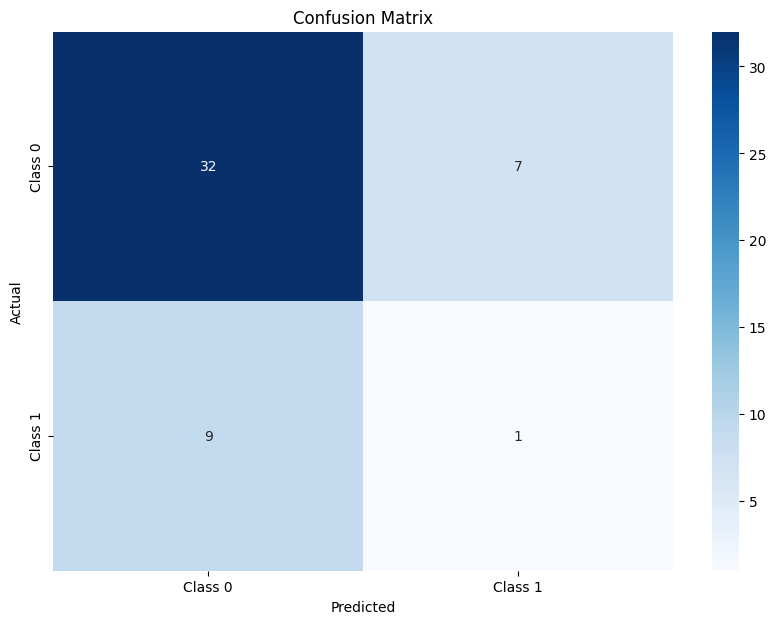

Accuracy: 1.0
---------------------------------------------------
Average cross-validation results:
 ╒══════════════╤═════════════════════╤══════════╤════════════╤═══════════╕
│ class        │ precision           │   recall │   f1-score │   support │
╞══════════════╪═════════════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.7858214181193288  │ 0.832051 │   0.802345 │ 39        │
├──────────────┼─────────────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.12190844286432523 │ 0.137727 │   0.122944 │ 10.2      │
├──────────────┼─────────────────────┼──────────┼────────────┼───────────┤
│ accuracy     │                     │ 0.688122 │            │           │
├──────────────┼─────────────────────┼──────────┼────────────┼───────────┤
│ macro avg    │                     │ 0.453865 │   0.484889 │  0.462645 │
├──────────────┼─────────────────────┼──────────┼────────────┼───────────┤
│ weighted avg │                     │ 0.648052 │   0.688122 │  0.661448 │

In [88]:
from tabulate import tabulate

mean_cm = np.round(np.mean(cms, axis=0))
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Print other evaluation metrics
mean_accuracy = np.round(np.mean(accuracies, axis=0))
print(f'Accuracy: {mean_accuracy}')
print("---------------------------------------------------")
avg_results = aggregate_results(fold_results)
formatted_report = format_classification_report(avg_results)
print("Average cross-validation results:\n", tabulate(formatted_report, headers=['class', 'precision', 'recall', 'f1-score', 'support'], tablefmt='fancy_grid'))